# Welcome to the Dark Art of Coding:
## Introduction to Machine Learning
Naive Bayes Classification

<img src='../universal_images/dark_art_logo.600px.png' width='300' style="float:right">

# Objectives
---

In this session, students should expect to:

* Cover an overview of Naive Bayes Classification
* Examine code samples that walk us through **The Process**:
   * Prep the data
   * Choose the model
   * Choose appropriate hyperparameters
   * Fit the model
   * Apply the model
   * Examine the results
* Explore a deep dive into this model
* Review some gotchas that might complicate things
* Review tips related to learning more

# Overview: Naive Bayes Classification
---

Naive Bayes Classification models are popular machine learning models because they:
* are fast
* are simple with few tunable hyperparameters (or even none)
* are suitable for dataset with very high dimensions
* can provide a nice baseline classification to start with before considering more sophisticated models

Naive Bayes Classifiers rely upon Bayes Theorem that allows you to predict a `label` if given some set of `features`:

$$P(label | features)$$

We won't cover the math here. 😀

I do go into it my [**Intro to Statistics and Probability**](https://www.youtube.com/watch?v=zzbw0JbiI6Y) tutorial.

Scikit Learn has a number of Naive Bayes Classifiers. They are referred to as **naive** because they make certain presumptions about the data.

* BernoulliNB
* ComplementNB
* GaussianNB
* MultinomialNB

Each one has slightly different assumptions about the data. For example, the GaussianNB model that we will look at presumes that the "likelihood of the features is assumed to be Gaussian" (i.e. the likelihood of any given feature falls on a bell curve).

Let's go through the steps of **Our Process** to see how this works.

## Prep the data

We start with a set of standard imports...

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

# NOTE: during the Choose the Model step, we will import the 
#     model we want, but there is no reason you can import it here.
# from sklearn.naive_bayes import GaussianNB 

### Prep the training Data

In [64]:
df = pd.read_csv('../universal_datasets/nbayes_train.csv', 
                 names=['x', 'y', 'category'])
df.head(10)

,x,y,category
0,-5.382405,3.099758,0
1,-4.102455,-0.223186,1
2,-0.475339,-0.201726,1
3,-6.909565,4.632675,0
4,-6.846011,4.600322,0
5,-7.656509,4.746101,0
6,-7.195801,5.161876,0
7,-4.711391,0.562727,1
8,-5.802642,1.023672,1
9,-5.037444,4.629984,0


In [65]:
X_train = df[['x', 'y']]
y_train = df['category']

It can be really useful to take a look at the features matrix and target array of the training data. For this dataset, let's use a scatter plot.

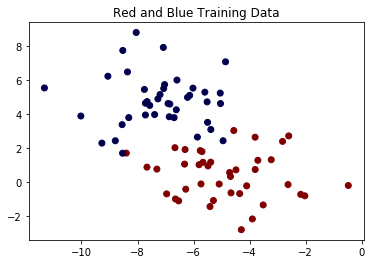

In [66]:
plt.scatter(X_train['x'], X_train['y'], c=y_train,
            cmap='seismic')
plt.title("Red and Blue Training Data");

### Prep the test data

In the following plot, we chose to set the alpha channel for the dots at 0.2 which makes the dots largely transparent, so that they are visually distinct.

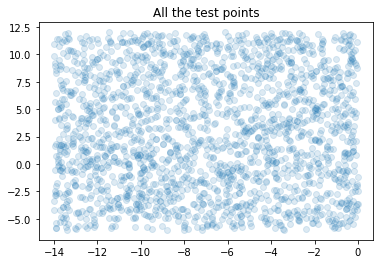

In [67]:
df_test = pd.read_csv('../universal_datasets/nbayes_test.csv',
                      names=['x','y'])

X_test = df_test[['x', 'y']]

plt.title("All the test points")
plt.scatter(X_test['x'], X_test['y'], alpha=0.15);

## Choose the Model

In this case, we have already decided upon using the GaussianNB model, so importing it is straightforward. But if we aren't sure what model we want we can always refer back to the [API Reference](https://scikit-learn.org/stable/modules/classes.html).

In [68]:
from sklearn.naive_bayes import GaussianNB

## Choose Appropriate Hyperparameters

This model doesn't require any hyperparameters, so we simply call the `GaussianNB` class.

In [69]:
model = GaussianNB()

## Fit the Model

Remember that the model expects a **features matrix** and a **target array**!

Here two columns from a `pandas DataFrame` represent a suitable 2D matrix for the features.

One column from the `pandas DataFrame` (i.e. a `pandas Series`) is suitable as the target array.

In [70]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Apply the Model

In [71]:
y_pred = model.predict(X_test)

In [72]:
y_pred.shape

(2000,)

In [73]:
y_pred[::100]

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0])

## Examine the results

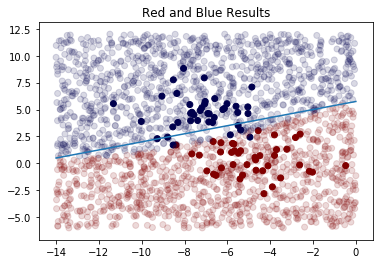

In [74]:
plt.title("Red and Blue Results")

plt.scatter(X_train['x'], X_train['y'], c=y_train,
            cmap='seismic')

plt.scatter(X_test['x'], X_test['y'], c=y_pred,
            cmap='seismic',
            alpha=0.15);

# NOTE: I added a simple straight line to the graph to emphasize a point:
# classifier doesn't necessarily produce a straight line.

plt.plot([-14, 0], [0.5, 5.75]);    

# Gotchas
---

A number of problems arose the first time I dove into this model:
    
**Naming conventions**: I ran into snags with naming conventions. My data was randomly generated and I just pictured it as x and y coordinates. But having x values and y values on my graph (and in my head) threw everything out of whack when I tried to translate that to the `X` and `y` inputs and outputs of the model.

**Understanding the data formats**: I kept messing up the format of the data. The `X` inputs (`X_train`, `X_test`) needed to be a 2D matrix and I kept trying to feed it 1D items (it was not helped by the problem above). 

**Making graphs shouldn't distract you from the machine learning**: Above, we have a number of dataviz steps intermixed with our machine learning steps. And there is the possibility that it might lead to confusion about what parts are *critical* to the machine learning and which parts are *nice to have*. Presuming your data is prepared properly, these four lines predict the category OR label for all the values in the test set. 

```python
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
```

**Sometimes starting too big is too confusing**: I often recommend that students pare back their problem to a small handful of items so that they can really see what is happening. Since this model takes a pair of coordinates and returns a label to say whether the coordinates fit in the **blue** category OR the **red** category, let's take a pair of coordinates that we know should fit clearly into the blue category (i.e. something above the dividing line.

In [75]:
# -5.382405 	3.099758 	0

y_pred_one = model.predict([[-5.38, 3.09]])
y_pred_one

array([0])

Now, let's take a pair of points (one in each category **red** and **blue**) and ensure that we get two different labels:

In [76]:
# -4.102455 	-0.223186 	1
# -7.656509 	4.746101 	0

y_pred_both = model.predict([[-4.1, -0.2],
                             [-7.6, 4.7]])
y_pred_both

array([1, 0])

# Deep Dive
---

N/A

# How to learn more: tips and hints
---

What should you do to advance your skills?

**Play with the tools**:

<img src='../universal_images/changing_stuff.jpg' width='350'>

**Get familiar with your favorite graphing library**: being able to visualize the results will help you get a sense of whether your model is accurately predicting. It will also help you to better meet the expection that data science is supposed to meet: to inform.

**Read the docs**: the more time you spend reading the docs, the faster you will begin to better understand the nuances of different models, which models apply in which situations. Don't be afraid if there are words in there that you don't understand. The vocabulary will come, given time and plenty of exposure. From this lesson, several good resources include:
* [API Reference](https://scikit-learn.org/stable/modules/classes.html)
* [Gaussian Naive Bayes Page](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
* [User Guide: Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

**Don't just copy-paste other people's models**: go home, find a dataset with values that are suitable to a given model and create your own model.

**Read the error messages**: They are sometimes scarier than the docs but they will often give you some insight into the nature of the problem.

# Experience Points!
---

# Read the docs...

Explore the docs related to Naive Bayes Classifiers.

Find answers to the following:

* What method do you use to calculate an 'Incremental fit on a batch of samples'?
* The Bernoulli Naive Bayes may perform better on some datasets. Which datasets are listed?

---
When you complete this exercise, please put your **green** post-it on your monitor. 

If you want to continue on at your own-pace, please feel free to do so.

<img src='../universal_images/green_sticky.300px.png' width='200' style='float:left'>

# References
---

Below are references that may assist you in learning more:
    
|Title (link)|Comments|
|---|---|
|[API Reference](https://scikit-learn.org/stable/modules/classes.html)||
|[Gaussian Naive Bayes Page](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)||
|[User Guide: Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)||